In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [44]:
df = pd.read_csv("data/Customers.csv", sep="\t")
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0.5, 1.0, 'Age distribution')

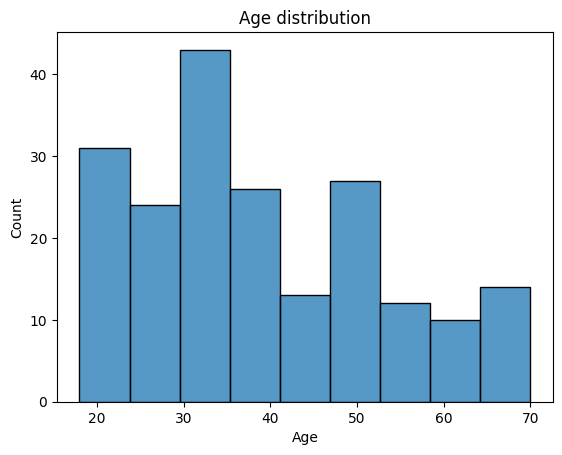

In [46]:
sns.histplot(data=df, x="Age")
plt.title("Age distribution")


Text(0.5, 1.0, 'Relationship between Age and Gender')

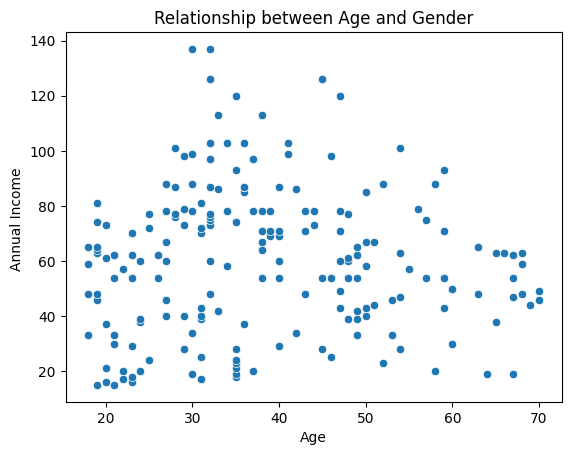

In [47]:
sns.scatterplot(data=df, x="Age", y="Annual Income ")
plt.title("Relationship between Age and Gender")

In [48]:
def group_age(age):
    if age > 20 and age <31:
        return "21-30"
    elif age > 30 and age <41:
        return "31-40"
    elif age > 40 and age <51:
        return "41-50"
    elif age > 50 and age <61:
        return "51-60"
    elif age > 60 and age <71:
        return "61-70"
    elif age > 70:
        return ">70"

In [49]:
df["Age Group"] =df["Age"].apply(group_age)

order = ["21-30", "31-40", "41-50", "51-60", "61-70", ">70"]



In [50]:
mask = df.groupby("Age Group")["Annual Income "].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x= "Age Group", y="Annual Income ", height=500)

annotation = []
for x, y in zip(mask["Age Group"], mask["Annual Income "]):
    annotation.append(
        dict(x=x, y=y+20,
        text=str(round(y,2))+'$',
        font=dict(family='Arial', size=14, color='rgb(66,99,236'),showarrow=False)
    )

fig.update_xaxes(categoryorder='array', categoryarray=order)
#fig.update_layout(annotations=annotation)
fig.show()

### KMEANS CLUSTERING

In [53]:
data= df[["Annual Income ","Spending Score (1-100)"]]
df_log = np.log(data)

In [54]:
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)

In [55]:
errors = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    errors.append(model.inertia_) 
 


/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` 

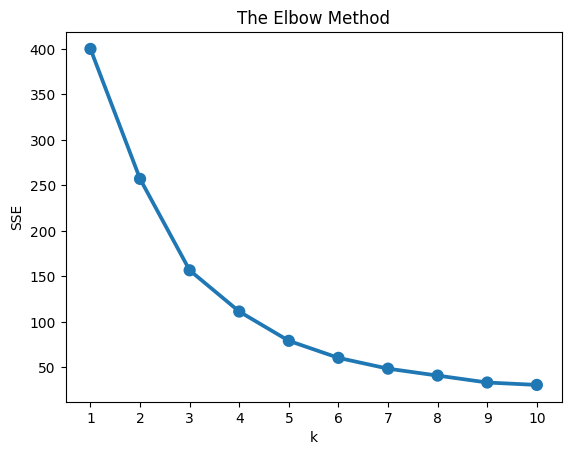

In [56]:
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(range(1, 11)), y=errors)
plt.savefig("Elbow.png")

In [57]:
from kneed import KneeLocator
kl = KneeLocator(x = range(1, 11),
                 y = errors,
                 curve="convex",
                 direction="decreasing")
print('The optimum number of clusters is: ' + str(kl.elbow))

The optimum number of clusters is: 4


In [58]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(df_scaled)

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=42)

In [59]:
data = data.assign(ClusterLabel= model.labels_)

In [61]:
data.groupby("ClusterLabel")[["Annual Income ", "Spending Score (1-100)"]].median()

,Annual Income,Spending Score (1-100)
ClusterLabel,,
0,31.5,60.5
1,85.0,14.0
2,65.0,55.0
3,22.5,9.5


In [62]:
fig = px.scatter(
    data_frame=data,
    x = "Annual Income ",
    y= "Spending Score (1-100)",
    title = "Relationship between Income VS Spending Score",
    color = "ClusterLabel",
    height=500
)
fig.show()

In [63]:
data = df[["Age","Annual Income ", "Spending Score (1-100)"]]

In [64]:
df_log =  np.log(data)
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)

In [65]:
sse = {}
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    sse[k] = model.inertia_

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` 

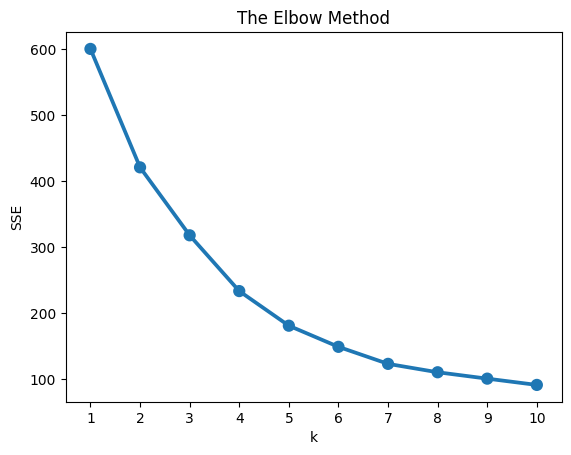

In [66]:
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [67]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(df_scaled)


data = data.assign(ClusterLabel= model.labels_)

/opt/homebrew/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [68]:
result = data.groupby("ClusterLabel").agg({"Age":"mean", "Annual Income ":"median", "Spending Score (1-100)":"median"}).round()

In [69]:
result

,Age,Annual Income,Spending Score (1-100)
ClusterLabel,,,
0,42.0,78.0,10.0
1,54.0,54.0,46.0
2,31.0,76.0,70.0
3,26.0,28.0,69.0


In [71]:
fig = px.scatter_3d(data_frame=data, x="Annual Income ", 
                    y="Spending Score (1-100)", z="Age", color="ClusterLabel", height=550,
                   title = "Visualizing Cluster Result Using 3 Features")
fig.show()